In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [2]:
!wget https://results.cik.bg/pi2021/export.zip -O data/izbori.zip

--2021-05-09 17:07:44--  https://results.cik.bg/pi2021/export.zip
Resolving results.cik.bg (results.cik.bg)... 104.22.7.29, 172.67.36.10, 104.22.6.29, ...
Connecting to results.cik.bg (results.cik.bg)|104.22.7.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17164653 (16M) [application/zip]
Saving to: ‘data/izbori.zip’

data/izbori.zip     100%[===================>]  16,37M  9,55MB/s    in 1,7s    

2021-05-09 17:07:46 (9,55 MB/s) - ‘data/izbori.zip’ saved [17164653/17164653]



In [3]:
!#unzip data/izbori.zip  -d data/

In [4]:
!ls data

cik_parties_04.04.2021.txt	 protocols_04.04.2021.txt
izbori.zip			 readme_04.04.2021.txt
local_candidates_04.04.2021.txt  sections_04.04.2021.txt
preferences_04.04.2021.txt	 votes_04.04.2021.txt
preferencesList_04.04.2021.txt	 votes_mv_04.04.2021.txt
preferences_mv_04.04.2021.txt	 wrong_totals.csv


In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)


In [6]:
!head data/cik_parties_04.04.2021.txt

1;ПП ВМРО – БЪЛГАРСКО НАЦИОНАЛНО ДВИЖЕНИЕ
2;НИЕ, ГРАЖДАНИТЕ (ПП КОАЛИЦИЯ ЗА ТЕБ БЪЛГАРИЯ, ПП БЪЛГАРСКА ДЕМОКРАТИЧНА ОБЩНОСТ)
3;Български национален съюз – НД
4;БСП за БЪЛГАРИЯ
5;ВЪЗРАЖДАНЕ
6;ПП АБВ
7;АТАКА
8;КОНСЕРВАТИВНО ОБЕДИНЕНИЕ НА ДЕСНИЦАТА /ПП КОД/
9;Движение за права и свободи - ДПС
10;БЪЛГАРСКА ПРОГРЕСИВНА ЛИНИЯ


In [7]:
parties = pd.read_csv("data/cik_parties_04.04.2021.txt", sep=";", names=["id", "party"]).set_index("id")
parties

,party
id,
1,ПП ВМРО – БЪЛГАРСКО НАЦИОНАЛНО ДВИЖЕНИЕ
2,"НИЕ, ГРАЖДАНИТЕ (ПП КОАЛИЦИЯ ЗА ТЕБ БЪЛГАРИЯ, ..."
3,Български национален съюз – НД
4,БСП за БЪЛГАРИЯ
5,ВЪЗРАЖДАНЕ
6,ПП АБВ
7,АТАКА
8,КОНСЕРВАТИВНО ОБЕДИНЕНИЕ НА ДЕСНИЦАТА /ПП КОД/
9,Движение за права и свободи - ДПС


In [8]:
!head data/votes_04.04.2021.txt

010100001;1;1;7;5;2;2;0;0;0;3;0;0;0;4;77;55;22;5;4;3;1;6;1;1;0;7;0;0;0;8;0;0;0;9;0;0;0;10;0;0;0;11;25;13;12;12;4;3;1;13;0;0;0;14;10;2;8;15;0;0;0;16;0;0;0;17;0;0;0;18;14;9;5;19;0;0;0;20;1;0;1;21;20;11;9;22;0;0;0;23;1;1;0;24;36;29;7;25;1;1;0;26;0;0;0;27;0;0;0;28;118;104;14;29;82;58;24;30;0;0;0;31;0;0;0
010100002;1;1;11;9;2;2;2;2;0;3;0;0;0;4;50;37;13;5;5;4;1;6;0;0;0;7;0;0;0;8;1;1;0;9;0;0;0;10;0;0;0;11;40;25;15;12;2;1;1;13;1;0;1;14;7;5;2;15;1;1;0;16;0;0;0;17;0;0;0;18;21;15;6;19;0;0;0;20;3;2;1;21;24;22;2;22;0;0;0;23;0;0;0;24;25;22;3;25;0;0;0;26;0;0;0;27;0;0;0;28;125;111;14;29;56;38;18;30;1;0;1;31;0;0;0
010100003;1;1;9;9;0;2;0;0;0;3;1;1;0;4;48;34;14;5;2;2;0;6;1;1;0;7;2;2;0;8;1;1;0;9;1;1;0;10;0;0;0;11;18;10;8;12;0;0;0;13;0;0;0;14;7;5;2;15;0;0;0;16;0;0;0;17;0;0;0;18;12;5;7;19;0;0;0;20;2;2;0;21;11;7;4;22;0;0;0;23;1;1;0;24;17;12;5;25;0;0;0;26;1;1;0;27;0;0;0;28;134;115;19;29;68;39;29;30;0;0;0;31;0;0;0
010100004;1;1;9;5;4;2;0;0;0;3;0;0;0;4;73;49;24;5;2;1;1;6;2;2;0;7;0;0;0;8;0;0;0;9;0;0;0;10;1;1;0;

In [9]:
!cat data/readme_04.04.2021.txt

﻿ИЗБОРИ ЗА НАРОДНИ ПРЕДСТАВИТЕЛИ 2021

1. Относно данните
Централната избирателна комисия със съдействието на Информационно обслужване АД
 в качеството на избран изпълнител на компютърната обработка на резултатите от
изборите за Народни представители, в съответствие с Директива 2003/98/ЕО на Европейския парламент и на
 Съвета от 17 ноември 2003 г. относно повторната употреба на информация в 
обществения сектор, изменена с Директива 2013/37/ЕС на Европейския парламент и
на Съвета от 26 юни 2013 г. (обн. в официален вестник на Европейския съюз L175,
стр.1 от 27.06.2013), транспонирана в българското законодателство в Закона за
достъп до обществената информация, предоставят на интернет страницата си
www.cik.bg пълните данни от актуализираната база данни, приета с решение на ЦИК
.......................... г. в машинночетим формат заедно с метаданните им във формат,
гарантиращ оперативна съвместимост – структури са в comma-separated values (CSV) 
формат.

2. Описание на файловете
readme.txt 

In [63]:
section_data = pd.read_csv('data/sections_04.04.2021.txt', sep=';', 
                           names=["section_id", "admin_id", "admin_name", "EKATTE", "city", "is_mobile", "is_ship", "is_machine"],
                          dtype={"section_id": object})
section_data.head()

,section_id,admin_id,admin_name,EKATTE,city,is_mobile,is_ship,is_machine
0,010100001,1,01. БЛАГОЕВГРАД,2676,гр.Банско,0,0,1
1,010100002,1,01. БЛАГОЕВГРАД,2676,гр.Банско,0,0,1
2,010100003,1,01. БЛАГОЕВГРАД,2676,гр.Банско,0,0,1
3,010100004,1,01. БЛАГОЕВГРАД,2676,гр.Банско,0,0,1
4,010100005,1,01. БЛАГОЕВГРАД,2676,гр.Банско,0,0,1


In [10]:
def find_errors(l):
    entries = l.split(";")
    section_id = entries[0]
    adm_id = entries[1]
    votes = [int(v) if v!='' else 0 for v in entries[2:]]
    wrong = []
    for i in range(0, len(votes),4):
        if votes[i+1] != votes[i+2] + votes[i+3]:
            wrong.append({
                "section": section_id,
                "party": votes[i],
                "total": votes[i+1],
                "paper": votes[i+2],
                "machine": votes[i+3]
            })
    return wrong
    
total_wrong = []
for line in open("data/votes_04.04.2021.txt"):
    total_wrong.extend(find_errors(line.strip()))

    
total_wrong = pd.DataFrame(total_wrong)
total_merged = pd.merge(total_wrong, parties, left_on="party", right_index=True)
total_merged.drop(columns="party_x", inplace=True)
total_merged.rename(columns={"party_y": "party_name"})
total_merged.to_csv("data/wrong_totals.csv")

In [11]:
section_votes = []
def get_votes(l, parties):
    entries = l.split(";")
    section_id = entries[0]
    adm_id = entries[1]
    votes = [int(v) if v!='' else 0 for v in entries[2:]]
    res = {
        'section_id': section_id,
        'admin_id': adm_id
    }
    total_votes = 0
    for i in range(0, len(votes), 4):
        party_id = votes[i]
        if party_id > 30:
            continue
        #party_name = parties.loc[party_id]['party']
        party_votes = votes[i+1]
        res[party_id] = party_votes
        total_votes += party_votes
    res['total_votes'] = total_votes
    return res

section_votes = []
for line in open("data/votes_04.04.2021.txt"):
    section_votes.append(get_votes(line.strip(), parties))
    
section_votes = pd.DataFrame(section_votes)
section_votes.head()

,section_id,admin_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,total_votes
0,010100001,1,7,0,0,77,4,1,0,0,0,0,25,4,0,10,0,0,0,14,0,1,20,0,1,36,1,0,0,118,82,0,401
1,010100002,1,11,2,0,50,5,0,0,1,0,0,40,2,1,7,1,0,0,21,0,3,24,0,0,25,0,0,0,125,56,1,375
2,010100003,1,9,0,1,48,2,1,2,1,1,0,18,0,0,7,0,0,0,12,0,2,11,0,1,17,0,1,0,134,68,0,336
3,010100004,1,9,0,0,73,2,2,0,0,0,1,34,2,1,11,1,0,0,14,2,5,14,1,0,35,1,0,1,151,46,0,406
4,010100005,1,12,0,0,54,6,1,0,0,1,0,37,2,1,9,0,0,0,12,0,1,24,0,0,40,0,0,1,118,39,0,358


In [12]:
len(section_votes)

12941

In [13]:
section_votes.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,total_votes
count,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00,12941.00
mean,9.00,0.37,0.22,37.10,6.06,1.14,1.21,0.73,25.99,0.29,23.36,1.02,0.27,7.30,0.07,0.28,0.18,11.66,0.64,1.30,3.25,0.17,0.12,5.87,0.43,0.27,0.26,64.73,43.66,0.26,247.22
std,10.68,0.82,0.60,25.22,8.41,1.88,1.58,1.36,60.79,0.87,34.36,1.56,0.66,9.02,0.32,0.82,0.50,10.48,1.12,1.72,7.11,0.49,0.41,6.44,0.85,0.62,0.62,46.88,42.12,0.64,141.96
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,1.00,0.00,0.00,15.00,1.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,29.00,9.00,0.00,138.00
50%,7.00,0.00,0.00,36.00,4.00,0.00,1.00,0.00,4.00,0.00,11.00,0.00,0.00,5.00,0.00,0.00,0.00,10.00,0.00,1.00,1.00,0.00,0.00,4.00,0.00,0.00,0.00,63.00,40.00,0.00,261.00
75%,13.00,1.00,0.00,53.00,9.00,2.00,2.00,1.00,18.00,0.00,30.00,2.00,0.00,11.00,0.00,0.00,0.00,18.00,1.00,2.00,3.00,0.00,0.00,8.00,1.00,0.00,0.00,88.00,65.00,0.00,340.00
max,190.00,24.00,25.00,340.00,153.00,45.00,40.00,20.00,1199.00,23.00,398.00,23.00,18.00,151.00,13.00,28.00,7.00,96.00,20.00,17.00,146.00,13.00,8.00,123.00,14.00,6.00,16.00,505.00,787.00,9.00,1717.00


In [14]:
normalized_votes = section_votes[['section_id', 'admin_id']].copy()
for col in range(1, 31):
    normalized_votes[col] = section_votes[col]/section_votes['total_votes']
    
normalized_votes

,section_id,admin_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,010100001,1,1.75e-02,0.00e+00,0.00e+00,0.19,9.98e-03,2.49e-03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.06,9.98e-03,0.00e+00,0.02,0.00e+00,0.00e+00,0.00e+00,0.03,0.00e+00,2.49e-03,4.99e-02,0.00e+00,2.49e-03,8.98e-02,2.49e-03,0.00e+00,0.00e+00,0.29,0.20,0.00e+00
1,010100002,1,2.93e-02,5.33e-03,0.00e+00,0.13,1.33e-02,0.00e+00,0.00e+00,2.67e-03,0.00e+00,0.00e+00,0.11,5.33e-03,2.67e-03,0.02,2.67e-03,0.00e+00,0.00e+00,0.06,0.00e+00,8.00e-03,6.40e-02,0.00e+00,0.00e+00,6.67e-02,0.00e+00,0.00e+00,0.00e+00,0.33,0.15,2.67e-03
2,010100003,1,2.68e-02,0.00e+00,2.98e-03,0.14,5.95e-03,2.98e-03,5.95e-03,2.98e-03,2.98e-03,0.00e+00,0.05,0.00e+00,0.00e+00,0.02,0.00e+00,0.00e+00,0.00e+00,0.04,0.00e+00,5.95e-03,3.27e-02,0.00e+00,2.98e-03,5.06e-02,0.00e+00,2.98e-03,0.00e+00,0.40,0.20,0.00e+00
3,010100004,1,2.22e-02,0.00e+00,0.00e+00,0.18,4.93e-03,4.93e-03,0.00e+00,0.00e+00,0.00e+00,2.46e-03,0.08,4.93e-03,2.46e-03,0.03,2.46e-03,0.00e+00,0.00e+00,0.03,4.93e-03,1.23e-02,3.45e-02,2.46e-03,0.00e+00,8.62e-02,2.46e-03,0.00e+00,2.46e-03,0.37,0.11,0.00e+00
4,010100005,1,3.35e-02,0.00e+00,0.00e+00,0.15,1.68e-02,2.79e-03,0.00e+00,0.00e+00,2.79e-03,0.00e+00,0.10,5.59e-03,2.79e-03,0.03,0.00e+00,0.00e+00,0.00e+00,0.03,0.00e+00,2.79e-03,6.70e-02,0.00e+00,0.00e+00,1.12e-01,0.00e+00,0.00e+00,2.79e-03,0.33,0.11,0.00e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,326700461,32,1.03e-02,1.47e-03,0.00e+00,0.05,6.45e-02,1.47e-03,0.00e+00,2.93e-03,1.47e-03,0.00e+00,0.42,8.80e-03,0.00e+00,0.06,1.47e-03,1.47e-03,2.93e-03,0.04,1.47e-03,0.00e+00,4.40e-03,0.00e+00,0.00e+00,5.87e-03,2.93e-03,1.47e-03,0.00e+00,0.08,0.24,2.93e-03
12937,326800462,32,7.09e-03,0.00e+00,0.00e+00,0.06,1.52e-01,0.00e+00,3.55e-03,0.00e+00,2.84e-02,0.00e+00,0.25,7.09e-03,0.00e+00,0.05,0.00e+00,3.55e-03,0.00e+00,0.05,3.55e-03,0.00e+00,1.06e-02,0.00e+00,0.00e+00,7.09e-03,3.55e-03,0.00e+00,0.00e+00,0.06,0.30,0.00e+00
12938,326800463,32,4.88e-03,0.00e+00,0.00e+00,0.06,7.80e-02,4.88e-03,4.88e-03,4.88e-03,2.93e-02,0.00e+00,0.39,9.76e-03,0.00e+00,0.04,0.00e+00,0.00e+00,0.00e+00,0.06,4.88e-03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,9.76e-03,4.88e-03,0.00e+00,0.00e+00,0.06,0.22,4.88e-03
12939,326800464,32,1.55e-02,1.93e-03,0.00e+00,0.09,6.77e-02,3.87e-03,1.16e-02,1.35e-02,6.19e-02,1.93e-03,0.24,3.87e-03,0.00e+00,0.05,7.74e-03,0.00e+00,0.00e+00,0.05,5.80e-03,5.80e-03,3.87e-03,1.93e-03,0.00e+00,3.87e-03,3.87e-03,1.93e-03,0.00e+00,0.11,0.23,1.93e-03


In [15]:
pd.DataFrame(normalized_votes[[i for i in range(1,31)]].mean().round(2)).transpose()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.04,0.0,0.0,0.16,0.02,0.0,0.01,0.0,0.13,0.0,0.08,0.0,0.0,0.02,0.0,0.0,0.0,0.04,0.0,0.01,0.01,0.0,0.0,0.03,0.0,0.0,0.0,0.27,0.16,0.0


In [16]:
actual_votes = pd.Series([0.0364, 0.0015, 0.0009, 0.1501, 0.0245, 0.0046, 0.0049, 0.0029, 0.1051, 0.0012, 0.0945, 0.0041, 0.0011, 0.0295, 0.0003, 0.0011, 0.0007, 0.0472, 0.0026, 0.0053, 0.0131, 0.0007, 0.0005, 0.0237, 0.0017, 0.0011, 0.001, 0.2618, 0.1766, 0.0011
], index=[i for i in range(1, 31)])
pd.DataFrame(actual_votes.round(2)).transpose()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.04,0.0,0.0,0.15,0.02,0.0,0.0,0.0,0.11,0.0,0.09,0.0,0.0,0.03,0.0,0.0,0.0,0.05,0.0,0.01,0.01,0.0,0.0,0.02,0.0,0.0,0.0,0.26,0.18,0.0


In [17]:
from sklearn.cluster import KMeans

In [18]:
cols = [i for i in range(1,31)]

In [19]:
inertias = {}
for num_clusters in range(1, 20):
    kmeans = KMeans(num_clusters)
    kmeans.fit(normalized_votes[cols])
    inertias[num_clusters] = kmeans.inertia_
    print(num_clusters, kmeans.inertia_)
    

1 1399.3827543375828
2 701.5168366571793
3 540.2305264221734
4 465.17960601801616
5 399.55731838770043
6 338.85356658476985
7 309.0819867521998
8 291.0237233501585
9 274.22338028573307
10 260.7613174455498
11 247.892552789215
12 236.10135605333454
13 224.41844337650534
14 213.23670724921413
15 205.64030899513085
16 198.52987880095176
17 193.0058606286031
18 187.50383578616174
19 182.69725584008162


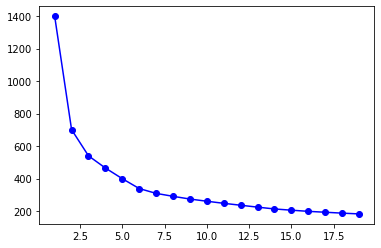

In [20]:
pd.Series(inertias).plot(style='b-o')

In [21]:
kmeans = KMeans(7, random_state=42)
kmeans.fit(normalized_votes[cols])
print(7, kmeans.inertia_)

7 309.0812736952655


In [22]:
pd.Series(kmeans.labels_).value_counts()

5    4816
0    2647
4    1416
1    1104
6    1049
3     984
2     925
dtype: int64

In [28]:
pc = {
    4: cm.get_cmap('Reds'),
    9: cm.get_cmap('Purples'),
    28: cm.get_cmap('Blues'),
    29: cm.get_cmap('BuPu'),
    18: cm.get_cmap('Greens'),
    11: cm.get_cmap('Blues')
}
def to_hex(rgba):
    return "".join([hex(x)[2:] for x in rgba[:3]])

def party_colors(v):
    bgdf = v.copy()
    bgdf[cols] = 'background-color: white'
    for p, colormap in pc.items():
        bgdf[p] =  [f'background-color: #{to_hex(c)}' for c in colormap(v[p], bytes=True)]
    return bgdf
pd.DataFrame(kmeans.cluster_centers_, columns=cols).round(2).style.apply(party_colors, axis=None)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.04,0.00,0.00,0.18,0.02,0.00,0.01,0.00,0.04,0.00,0.05,0.00,0.00,0.02,0.00,0.00,0.00,0.04,0.00,0.01,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.36,0.15,0.00
1,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.79,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.10,0.02,0.00
2,0.04,0.00,0.00,0.41,0.01,0.00,0.01,0.00,0.05,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.01,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.21,0.10,0.00
3,0.02,0.00,0.00,0.12,0.01,0.00,0.00,0.00,0.07,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.61,0.07,0.00
4,0.03,0.00,0.00,0.13,0.03,0.01,0.00,0.01,0.01,0.00,0.28,0.00,0.00,0.04,0.00,0.00,0.00,0.06,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.19,0.15,0.00
5,0.05,0.00,0.00,0.17,0.03,0.01,0.01,0.00,0.03,0.00,0.08,0.01,0.00,0.04,0.00,0.00,0.00,0.06,0.00,0.01,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.23,0.23,0.00
6,0.02,0.00,0.00,0.11,0.01,0.00,0.00,0.00,0.41,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.26,0.08,0.00


In [24]:
pd.DataFrame(actual_votes).transpose().round(2).style.apply(party_colors, axis=None)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.04,0.00,0.00,0.15,0.02,0.00,0.00,0.00,0.11,0.00,0.09,0.00,0.00,0.03,0.00,0.00,0.00,0.05,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.26,0.18,0.00


In [25]:
import scipy

In [26]:
distances = scipy.spatial.distance_matrix(normalized_votes[cols], kmeans.cluster_centers_)

In [52]:
normalized_votes.head()

,section_id,admin_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,010100001,1,0.02,0.00e+00,0.00e+00,0.19,9.98e-03,2.49e-03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.06,9.98e-03,0.00e+00,0.02,0.00e+00,0.0,0.0,0.03,0.00e+00,2.49e-03,0.05,0.00e+00,2.49e-03,0.09,2.49e-03,0.00e+00,0.00e+00,0.29,0.20,0.00e+00
1,010100002,1,0.03,5.33e-03,0.00e+00,0.13,1.33e-02,0.00e+00,0.00e+00,2.67e-03,0.00e+00,0.00e+00,0.11,5.33e-03,2.67e-03,0.02,2.67e-03,0.0,0.0,0.06,0.00e+00,8.00e-03,0.06,0.00e+00,0.00e+00,0.07,0.00e+00,0.00e+00,0.00e+00,0.33,0.15,2.67e-03
2,010100003,1,0.03,0.00e+00,2.98e-03,0.14,5.95e-03,2.98e-03,5.95e-03,2.98e-03,2.98e-03,0.00e+00,0.05,0.00e+00,0.00e+00,0.02,0.00e+00,0.0,0.0,0.04,0.00e+00,5.95e-03,0.03,0.00e+00,2.98e-03,0.05,0.00e+00,2.98e-03,0.00e+00,0.40,0.20,0.00e+00
3,010100004,1,0.02,0.00e+00,0.00e+00,0.18,4.93e-03,4.93e-03,0.00e+00,0.00e+00,0.00e+00,2.46e-03,0.08,4.93e-03,2.46e-03,0.03,2.46e-03,0.0,0.0,0.03,4.93e-03,1.23e-02,0.03,2.46e-03,0.00e+00,0.09,2.46e-03,0.00e+00,2.46e-03,0.37,0.11,0.00e+00
4,010100005,1,0.03,0.00e+00,0.00e+00,0.15,1.68e-02,2.79e-03,0.00e+00,0.00e+00,2.79e-03,0.00e+00,0.10,5.59e-03,2.79e-03,0.03,0.00e+00,0.0,0.0,0.03,0.00e+00,2.79e-03,0.07,0.00e+00,0.00e+00,0.11,0.00e+00,0.00e+00,2.79e-03,0.33,0.11,0.00e+00


In [98]:
normalized_votes.iloc[[8181, 11083, 12278,  6892,   950, 10555,  3367,  2423,  2981,
       11294,  5821,  6690,  3368,  7891,   949,  8516, 12313,  4682,
        2327,  5325]].round(2)

,section_id,admin_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
8181,212000156,21,0.02,0.00,0.00,0.40,0.01,0.00,0.01,0.00,0.07,0.01,0.02,0.01,0.00,0.03,0.00,0.0,0.0,0.04,0.00,0.02,0.01,0.00,0.0,0.07,0.0,0.00,0.00,0.20,0.11,0.00
11083,273100208,27,0.03,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.06,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,0.06,0.0,0.00,0.00,0.23,0.14,0.00
12278,310700023,31,0.03,0.01,0.01,0.38,0.01,0.01,0.03,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.0,0.04,0.00,0.00,0.04,0.01,0.0,0.06,0.0,0.01,0.00,0.23,0.10,0.00
6892,172300032,17,0.05,0.01,0.00,0.44,0.01,0.00,0.01,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.0,0.0,0.05,0.00,0.01,0.00,0.00,0.0,0.06,0.0,0.00,0.00,0.24,0.09,0.00
950,020400327,2,0.04,0.00,0.00,0.37,0.00,0.01,0.01,0.00,0.03,0.00,0.04,0.00,0.00,0.04,0.00,0.0,0.0,0.06,0.00,0.00,0.00,0.01,0.0,0.05,0.0,0.00,0.00,0.23,0.12,0.01
10555,264300021,26,0.05,0.00,0.02,0.42,0.00,0.02,0.00,0.00,0.10,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,0.02,0.0,0.00,0.02,0.23,0.08,0.00
3367,081500028,8,0.04,0.00,0.00,0.46,0.03,0.00,0.01,0.01,0.04,0.00,0.02,0.00,0.01,0.01,0.00,0.0,0.0,0.02,0.01,0.01,0.01,0.00,0.0,0.04,0.0,0.00,0.00,0.17,0.10,0.00
2423,043200008,4,0.00,0.00,0.00,0.46,0.02,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.0,0.07,0.00,0.00,0.00,0.00,0.0,0.04,0.0,0.00,0.00,0.22,0.13,0.00
2981,063100018,6,0.05,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.06,0.00,0.02,0.00,0.02,0.05,0.00,0.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,0.02,0.0,0.00,0.00,0.20,0.09,0.00
11294,282400038,28,0.00,0.00,0.00,0.43,0.02,0.00,0.01,0.00,0.10,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.0,0.06,0.00,0.00,0.00,0.00,0.0,0.03,0.0,0.00,0.00,0.20,0.12,0.00


In [99]:
pd.merge(normalized_votes.iloc[[8181, 11083, 12278,  6892,   950, 10555,  3367,  2423,  2981,
       11294,  5821,  6690,  3368,  7891,   949,  8516, 12313,  4682,
        2327,  5325]], section_data, on=['section_id'])['city']

0           с.Младово
1     гр.Стара Загора
2             с.Пчела
3           с.Брягово
4            с.Равнец
5           с.Дружево
6        с.Козлодуйци
7            с.Коевци
8            с.Остров
9         с.Ковачевец
10        с.Черковица
11         гр.Брезово
12         с.Котленци
13           с.Гарван
14           с.Равнец
15           с.Малево
16         с.Тамарино
17       с.Балабанско
18           с.Иванча
19         с.Поибрене
Name: city, dtype: object

In [94]:
distances[:, 2].argsort()[:20]

array([ 8181, 11083, 12278,  6892,   950, 10555,  3367,  2423,  2981,
       11294,  5821,  6690,  3368,  7891,   949,  8516, 12313,  4682,
        2327,  5325])

In [115]:
dist_to_center = pd.Series(dict(zip(normalized_votes['section_id'], distances.min(axis=-1)))).sort_values()
interesting = dist_to_center.iloc[-20:].index
dist_to_center.iloc[-50:]

261700032    0.48
152400138    0.48
200100210    0.49
014000036    0.49
014000040    0.49
014000055    0.49
014000067    0.50
312500050    0.50
310300013    0.51
171500005    0.51
152400234    0.51
322300191    0.51
014000045    0.51
312500024    0.52
310300020    0.53
120400011    0.53
153700040    0.53
324800335    0.53
014000049    0.53
030603405    0.53
244607076    0.53
310300021    0.54
014000047    0.54
012800010    0.55
264700011    0.55
014000058    0.55
014000053    0.56
172500018    0.56
200100207    0.57
323500293    0.58
200100211    0.58
120400012    0.59
283500066    0.59
014000054    0.59
050100011    0.59
310300022    0.59
120400019    0.63
014000051    0.63
014000059    0.63
014000052    0.64
310300018    0.64
223800013    0.65
014000062    0.66
091600119    0.67
324800338    0.71
132900020    0.72
014000048    0.76
324800339    0.79
323900300    0.82
042600022    0.88
dtype: float64

In [116]:
normalized_votes.loc[normalized_votes.section_id.isin(interesting), cols].round(2).style.apply(party_colors,axis=None)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
436,0.75,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.08,0.05,0.01
439,0.64,0.00,0.00,0.13,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.13,0.07,0.00
440,0.62,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.12,0.02,0.00
442,0.57,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.02,0.00,0.00,0.00,0.07,0.05,0.00
447,0.63,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.05,0.00
450,0.65,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
2336,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.04,0.00,0.00
2436,0.59,0.00,0.00,0.15,0.02,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.10,0.05,0.00
4024,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.62,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00
4794,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.10,0.00,0.00,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.10,0.00


In [118]:
normalized_votes.iloc[12255]

section_id    310300022
admin_id             31
1                     0
2                     0
3                     0
4                  0.96
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
11                    0
12                    0
13                    0
14                    0
15                    0
16                    0
17                    0
18                    0
19                    0
20                    0
21                    0
22                    0
23                    0
24                    0
25                    0
26                    0
27                    0
28                 0.04
29                    0
30                    0
Name: 12255, dtype: object

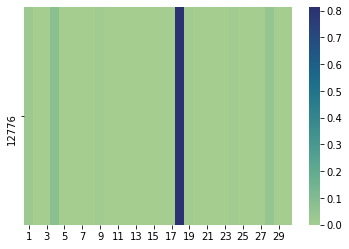

In [99]:
sns.heatmap(normalized_votes.loc[normalized_votes.section_id=='323900300', cols], cmap='crest')